In [1]:
# Voy a realizar algunos Análisis Exploratorio de Datos (EDA) 

In [2]:
# Importo las librerias que me brinda Python.

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
import seaborn as sns
import sklearn.model_selection 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
# Realizo la importación de los datos.

df = pd.read_csv('termos.csv', encoding='latin1')
df.head()

,ID,Título,Precio,Precio Original,Condición,Cantidad disponible,Marca,Envío gratuito
0,MLA1642499266,Termo De Acero Inoxidable 1 Litro Frio Calor,23099.34,34999.0,new,100,Genérica,True
1,MLA1424303345,Termo Bala Acero Inox Doble Capa Termica 1 Lit...,9400.00,NaN,new,1,Libercam,False
2,MLA1409013755,Termo Thermio 1 L Pico Cebador Uso Extremo De ...,34999.30,49999.0,new,100,Thermio,True
3,MLA1269105647,Termo Media Manija Uruguayo 1 Litro Acero Inox...,11500.00,NaN,new,1,Cosmos,False
4,MLA1489681646,Termo Bala Acero Inoxidable 1 Litro Con Tapón ...,10135.00,NaN,new,1,Termo,False


In [4]:
# Realizo la función shape para comprobar los registros y columnas de mi dataset. 

df.shape

(150, 8)

In [5]:
# Consulto si hay algún valor null (NaN), me devolverá un booleano que en caso de ser true es porque si hay valores Nan.

df.isnull().values.any()

True

In [6]:
# Averiguo en que columnas hay valores null.

df.isnull().any()

ID                     False
Título                 False
Precio                 False
Precio Original         True
Condición              False
Cantidad disponible    False
Marca                  False
Envío gratuito         False
dtype: bool

In [7]:
# únicamente tuve valores null en la columna Precio Original, por lo que decido eliminarla para simplificar de manera resolutiva.

df.drop(["Precio Original"], axis = 1, inplace = True)
df.head()

,ID,Título,Precio,Condición,Cantidad disponible,Marca,Envío gratuito
0,MLA1642499266,Termo De Acero Inoxidable 1 Litro Frio Calor,23099.34,new,100,Genérica,True
1,MLA1424303345,Termo Bala Acero Inox Doble Capa Termica 1 Lit...,9400.00,new,1,Libercam,False
2,MLA1409013755,Termo Thermio 1 L Pico Cebador Uso Extremo De ...,34999.30,new,100,Thermio,True
3,MLA1269105647,Termo Media Manija Uruguayo 1 Litro Acero Inox...,11500.00,new,1,Cosmos,False
4,MLA1489681646,Termo Bala Acero Inoxidable 1 Litro Con Tapón ...,10135.00,new,1,Termo,False


In [8]:
# Constato que ahora no se encuentran valores null en el dataset.

df.isnull().values.any()

False

In [9]:
# Analizaré los datos que tienen que ver con las Marcas de Termos.
# Calculo el promedio de cada Marca de Termo según su valor Precio. 
promedio_por_marca = df.groupby("Marca")["Precio"].mean()

# Defino una función para formatear los números
def formato_precio(numero):
    return f"${numero:,.2f}"  # Agrega separadores de miles y dos decimales

# Aplico la función de formato a la Serie 'promedio_por_marca'
promedio_por_marca_formateado = promedio_por_marca.map(formato_precio)

# Muestro el resultado formateado
print("Promedio por Marca:")
print(promedio_por_marca_formateado)

Promedio por Marca:
Marca
Aquatal                  $35,911.02
Atom                     $13,265.34
BAZARTE                  $21,373.00
BRA                      $68,330.87
Big Star                 $11,054.00
Bremen                   $33,754.50
Coleman                  $73,061.19
Contigo                  $72,264.54
Cookpops                 $35,435.40
Cosmos                   $11,500.00
Dakota                   $36,695.67
De Fabica                $13,136.00
Discovery                $30,684.80
Discovery Adventure      $28,990.00
Discovery Adventures     $41,168.02
Ekco                     $13,249.00
El Rey del Termo         $11,881.00
Explorer                 $51,877.00
Genérica                 $18,420.39
Grabados Conquer         $24,499.55
Home Basics               $9,648.27
Kanson                   $18,494.55
Kovea                    $34,682.33
Kushiro                  $27,999.00
Libercam                 $11,447.63
Lumilagro                $48,010.95
Lüsqtoff                 $40,028.46
Ma

In [10]:
# Calculo el porcentaje representativo de cada Marca de Termo.

# Elimino el símbolo de dólar y convierto las cadenas en números
promedio_por_marca_numerico = promedio_por_marca_formateado.replace({'\$': '', ',': ''}, regex=True).astype(float)

# Calculo el total
total = promedio_por_marca_numerico.sum()

# Calculo el porcentaje representativo de cada marca de celular
porcentaje_por_marca = (promedio_por_marca_numerico / total) * 100

# Muestro el resultado
print("\nPorcentaje por Marca:\n", porcentaje_por_marca)


Porcentaje por Marca:
 Marca
Aquatal                 2.451380
Atom                    0.905527
BAZARTE                 1.458977
BRA                     4.664444
Big Star                0.754575
Bremen                  2.304170
Coleman                 4.987348
Contigo                 4.932966
Cookpops                2.418913
Cosmos                  0.785020
Dakota                  2.504942
De Fabica               0.896698
Discovery               2.094625
Discovery Adventure     1.978933
Discovery Adventures    2.810237
Ekco                    0.904411
El Rey del Termo        0.811028
Explorer                3.541260
Genérica                1.257424
Grabados Conquer        1.672403
Home Basics             0.658616
Kanson                  1.262486
Kovea                   2.367506
Kushiro                 1.911285
Libercam                0.781445
Lumilagro               3.277353
Lüsqtoff                2.732447
Maxon                   2.204818
Montagne                4.220125
Mor          

In [11]:
# Determino cual es la Marca con mayor porcentaje de todos.

tipo_mayor = porcentaje_por_marca.idxmax()
print("\nTipo con mayor porcentaje:", tipo_mayor)


Tipo con mayor porcentaje: Stanley


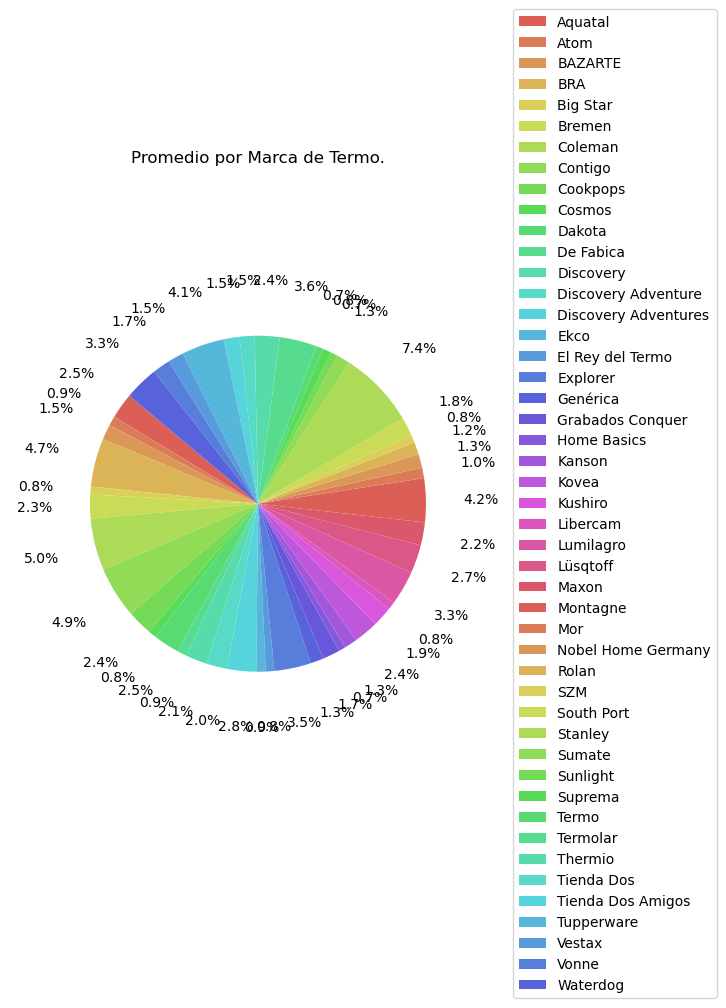

In [15]:
# Vuelco los valores en un gráfico representativo.


# Obtengo una lista de 23 colores distintos de la paleta de colores de Seaborn
colores = sns.color_palette('hls', n_colors=28)

# Vuelco los valores en un gráfico representativo.
plt.pie(porcentaje_por_marca, colors=colores, autopct='%1.1f%%', startangle=140, pctdistance=1.33)
plt.axis('equal')
plt.title('Promedio por Marca de Termo.', y=1.4)  # Mover el título hacia arriba

# Mostrar leyenda con etiquetas y colores al costado del gráfico
plt.legend(porcentaje_por_marca.index, loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

In [16]:
# Para los datos de las Termos con Envío gratuito.
# Cuento la cantidad de ocurrencias de cada valor en la columna "Envío gratuito"
# Obtengo el porcentaje de Termos con Envío gratuito.

envio_gratuito_counts = df['Envío gratuito'].value_counts()
percentage_envio_gratuito = (envio_gratuito_counts[True] / len(df)) * 100

print(f"Porcentaje de Heladeras con Envio gratuito: {percentage_envio_gratuito:.1f}%")

Porcentaje de Heladeras con Envio gratuito: 72.7%


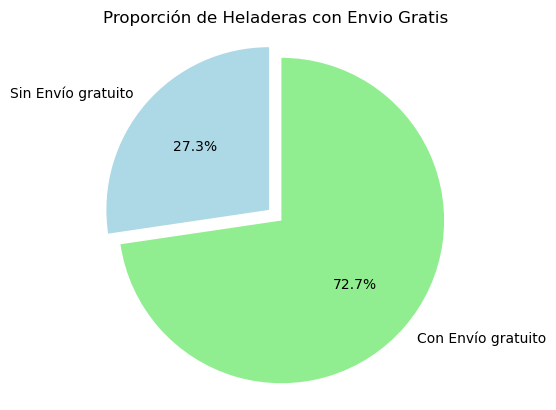

In [17]:
# Cuento la cantidad de ocurrencias de cada valor en la columna "Envío gratuito"
# Defino los datos para el gráfico circular

envio_gratuito_counts = df['Envío gratuito'].value_counts()
fig, ax = plt.subplots()
labels = ['Sin Envío gratuito', 'Con Envío gratuito']
sizes = [envio_gratuito_counts[False], envio_gratuito_counts[True]]
colors = ['lightblue', 'lightgreen']
explode = (0, 0.1) 

ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Proporción de Heladeras con Envio Gratis')
plt.show()

In [27]:
# Ahora trabajaré con un valor agregado de clasificación para mis datos.
# Decido crear un concepto nuevo denominado Calificación partiendo de los valores de precio y etiquetándolos según un criterio.

df['Calificación'] = pd.cut(df.Precio, bins=[0,40000 ,70000, 110000 ,float('inf')], labels=['Barato','Moderado','Caro','Premium'])

In [19]:
# Noto que ya se reconoce a Calificación como una columna más.

df[['Marca','Calificación','Precio']].shape

(150, 3)

In [28]:
# Obtengo la cantidad de registros por Calificación

df.Calificación.value_counts()

Calificación
Barato      82
Moderado    44
Caro        16
Premium      8
Name: count, dtype: int64

In [29]:
# Outliers normalizados. 

df.Calificación.value_counts(normalize=True)

Calificación
Barato      0.546667
Moderado    0.293333
Caro        0.106667
Premium     0.053333
Name: proportion, dtype: float64

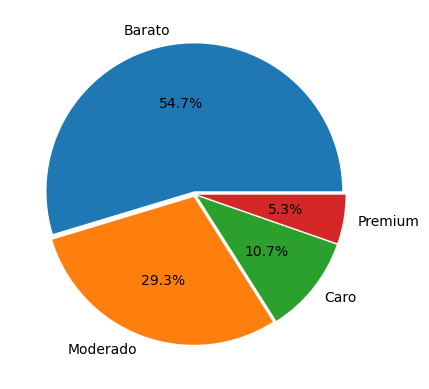

In [30]:
# Guardo los valores en una variable
calificacion_counts = df.Calificación.value_counts(normalize=True)

# Grafico el conteo de cada categoría en un gráfico de pastel
explode = [0.02] * len(calificacion_counts)
calificacion_counts.plot.pie(autopct='%1.1f%%', ylabel='', explode=explode)
plt.show()

In [31]:
# Obtengo el total de la suma de sus Precios.

df.groupby(['Calificación'])['Precio'].sum()

Calificación
Barato      1888252.27
Moderado    2323047.37
Caro        1392024.93
Premium     1057999.00
Name: Precio, dtype: float64

In [32]:
# Determino la media 
media_precios_por_calificacion = df.groupby(['Calificación'])['Precio'].mean()

# Aplicar la función de formato a cada número de la media de precios
media_precios_por_calificacion_formateada = media_precios_por_calificacion.apply(formato_precio)

# Mostrar los resultados
print(media_precios_por_calificacion_formateada)

Calificación
Barato       $23,027.47
Moderado     $52,796.53
Caro         $87,001.56
Premium     $132,249.88
Name: Precio, dtype: object


In [33]:
# Decido agrupar mis datos por Marca y ver la suma de sus precios.

# Agrupar por marca
datos_agrupados_marca = df.groupby('Marca')

# Obtener la suma de precios por marca
suma_precios_marca = datos_agrupados_marca['Precio'].sum()

# Mostrar la suma de precios por marca
print("Suma de precios por marca:")
print(suma_precios_marca)

Suma de precios por marca:
Marca
Aquatal                  143644.08
Atom                      13265.34
BAZARTE                   21373.00
BRA                       68330.87
Big Star                  11054.00
Bremen                    67509.00
Coleman                  438367.13
Contigo                  433587.25
Cookpops                  70870.80
Cosmos                    11500.00
Dakota                   440348.08
De Fabica                 13136.00
Discovery                153424.00
Discovery Adventure       28990.00
Discovery Adventures     123504.05
Ekco                      13249.00
El Rey del Termo          11881.00
Explorer                 155631.00
Genérica                  73681.54
Grabados Conquer          24499.55
Home Basics               19296.54
Kanson                    36989.10
Kovea                    104047.00
Kushiro                   55998.00
Libercam                  57238.16
Lumilagro                480109.51
Lüsqtoff                 240170.75
Maxon                 

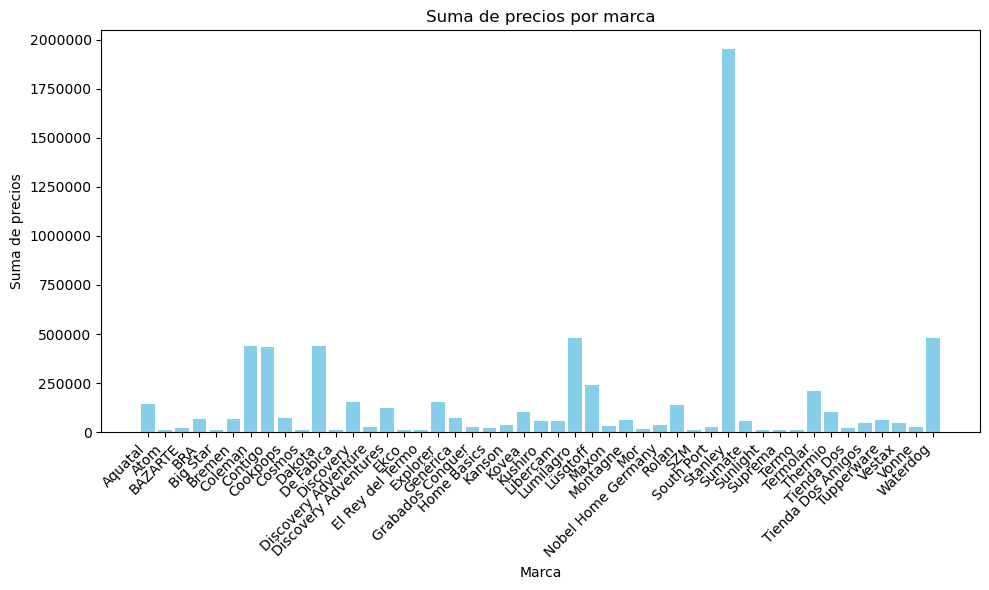

In [34]:
# Creo el gráfico de columnas
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
barras = plt.bar(suma_precios_marca.index, suma_precios_marca, color='skyblue')  # Crear barras con color azul celeste

# Personalizo el gráfico
plt.xlabel('Marca')
plt.ylabel('Suma de precios')
plt.title('Suma de precios por marca')
plt.xticks(rotation=45, ha='right')  # Rotar y alinear las etiquetas de marca
plt.ticklabel_format(style='plain', axis='y')  # Mostrar números completos en el eje y
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [35]:
# Clasificación con Árboles de decisión

# Es un método de aprendizaje automático supervisado que utiliza una estructura de árbol para tomar decisiones de clasificación.
# Un árbol de decisión es una estructura jerárquica compuesta por nodos de decisión y nodos de hoja. Cada nodo de decisión representa una pregunta o una prueba sobre una característica, y cada rama representa una posible respuesta o valor. Los nodos de hoja representan las clases o categorías finales a las que se clasificarán las instancias.
# Este algoritmo se basa en clasificar variables categóricas. Las predicciones se basan en combinaciones de valores en los campos de entrada.
# A través de iteraciones va realizando cortes en el conjunto de datos.
# El criterio mediante el cual se divide una rama en dos nodos hoja, es el índice de Gini. La división se hace de tal modo que se maximice el número de categorías dentro de cada una de estas divisiones que se van a realizar. La división intenta minimizar la entropía.
# Cuánto más homogéneo es el grupo, más se reduce la entropía desde el nodo padre al nodo hijo. Si la entropía en un nodo hijo llega a ser cero significa que el grupo es totalmente homogéneo y que, en consecuencia, esa rama del árbol es capaz de clasificar los usuarios, con un 100% de seguridad, en la categoría que corresponda.

In [ ]:
# Importo las librerias que me brinda Python.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,\
 recall_score, f1_score, roc_auc_score, classification_report
import warnings


In [36]:
# Realizo la importación de los datos.

df = pd.read_csv('termos.csv', encoding='latin1')
df.head()

,ID,Título,Precio,Precio Original,Condición,Cantidad disponible,Marca,Envío gratuito
0,MLA1642499266,Termo De Acero Inoxidable 1 Litro Frio Calor,23099.34,34999.0,new,100,Genérica,True
1,MLA1424303345,Termo Bala Acero Inox Doble Capa Termica 1 Lit...,9400.00,NaN,new,1,Libercam,False
2,MLA1409013755,Termo Thermio 1 L Pico Cebador Uso Extremo De ...,34999.30,49999.0,new,100,Thermio,True
3,MLA1269105647,Termo Media Manija Uruguayo 1 Litro Acero Inox...,11500.00,NaN,new,1,Cosmos,False
4,MLA1489681646,Termo Bala Acero Inoxidable 1 Litro Con Tapón ...,10135.00,NaN,new,1,Termo,False


In [37]:
# Para este analisis tomaré los valores de Precio para la variable X independiente.
# Y los valores de Envío gratuito para la variable Y dependiente.

In [38]:
# Coloco los datos de las columnas Precio en la variable X.
# Coloco los datos de la columna Envío gratuito en la variable y.

X = df.iloc[:, 2].values 
y = df.iloc[:, 7].values
X,y

(array([ 23099.34,   9400.  ,  34999.3 ,  11500.  ,  10135.  ,  40740.  ,
        120000.  , 106000.  ,  26499.  ,  25999.  ,  17100.  , 149999.  ,
         36672.  ,  23399.13,  63543.45,  10999.  , 120000.  ,  44981.5 ,
         42176.  ,  34999.3 ,  29420.32,  15336.  ,  11054.  ,  35991.  ,
         27649.  ,  11881.  ,  43528.06,  34999.3 ,  17900.  ,  55400.  ,
         39999.  ,  22619.42,  14324.1 , 133000.  ,  21283.  ,  15000.  ,
         55600.  ,  35435.4 ,  11959.54,  44981.5 ,  57303.  ,  68700.  ,
         55447.  ,  11959.54,  16799.  , 106000.  ,  11959.54,  29420.32,
         16798.  ,  30499.  ,  35991.  ,  22149.  , 106000.  ,  34169.49,
         64099.  ,  53424.51,  19079.36,  82709.1 ,  57933.  ,  16599.  ,
         39730.  ,  44981.5 ,  33945.  ,  40075.  ,  35435.4 ,  29999.  ,
         65856.  ,  71700.  ,  47249.16,  96900.  ,  44573.  ,  44981.5 ,
         39999.  ,  56713.  ,  28176.  ,  61821.91,   6998.  ,  79999.  ,
         72357.  ,  21274.26,  11959.5

In [39]:
# Utilizo LabelEnconder para convertir a números los datos categóricos de la columna Legendary almacenados en la variable y.

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y = y_encoded 
print(y)

[1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1
 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1
 1 1]


In [40]:
# Imprimo nuevamente mis variables con sus datos.

X,y

(array([ 23099.34,   9400.  ,  34999.3 ,  11500.  ,  10135.  ,  40740.  ,
        120000.  , 106000.  ,  26499.  ,  25999.  ,  17100.  , 149999.  ,
         36672.  ,  23399.13,  63543.45,  10999.  , 120000.  ,  44981.5 ,
         42176.  ,  34999.3 ,  29420.32,  15336.  ,  11054.  ,  35991.  ,
         27649.  ,  11881.  ,  43528.06,  34999.3 ,  17900.  ,  55400.  ,
         39999.  ,  22619.42,  14324.1 , 133000.  ,  21283.  ,  15000.  ,
         55600.  ,  35435.4 ,  11959.54,  44981.5 ,  57303.  ,  68700.  ,
         55447.  ,  11959.54,  16799.  , 106000.  ,  11959.54,  29420.32,
         16798.  ,  30499.  ,  35991.  ,  22149.  , 106000.  ,  34169.49,
         64099.  ,  53424.51,  19079.36,  82709.1 ,  57933.  ,  16599.  ,
         39730.  ,  44981.5 ,  33945.  ,  40075.  ,  35435.4 ,  29999.  ,
         65856.  ,  71700.  ,  47249.16,  96900.  ,  44573.  ,  44981.5 ,
         39999.  ,  56713.  ,  28176.  ,  61821.91,   6998.  ,  79999.  ,
         72357.  ,  21274.26,  11959.5

In [41]:
# Utilizo train_test_split para dividir un dataset en bloques. 
# Conjunto de testing por un lado y conjunto de entrenamiento por el otro.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [46]:
from sklearn.tree import DecisionTreeClassifier

# Ajusto el modelo de regresión logística con el conjunto de entrenamiento.
# Esto se hace para hacer predicciones en los datos de prueba y mostrar una tabla que compara las etiquetas reales con las etiquetas predichas para una muestra de prueba limitada.

classifier = DecisionTreeClassifier(criterion="entropy", random_state=0)
X_train_reshaped = X_train.reshape(-1, 1)
classifier.fit(X_train_reshaped, y_train)

# Reformatear los datos de prueba
X_test_reshaped = X_test.reshape(-1, 1)
y_pred = classifier.predict(X_test_reshaped)

# Crear un DataFrame para comparar las etiquetas reales con las predichas
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicción': y_pred})
print(comparison_df.head(100))

    Actual  Predicción
0        0           0
1        1           1
2        1           1
3        1           1
4        1           1
5        0           0
6        1           1
7        1           1
8        0           0
9        1           1
10       0           0
11       0           0
12       1           1
13       1           1
14       1           1
15       1           1
16       1           1
17       1           1
18       1           1
19       1           1
20       1           1
21       1           1
22       1           1
23       1           1
24       0           0
25       0           0
26       0           0
27       0           0
28       1           1
29       1           1
30       1           1
31       1           1
32       1           1
33       1           1
34       1           1
35       0           0
36       1           1
37       1           1


In [48]:
from sklearn.metrics import confusion_matrix

# Construyo la matriz de confusión, la cual es una técnica muy potente. 
# Se calcula sobre el conjunto de testing y se puede observar si las predicciones que ha realizado el algoritmo son potentes
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0]
 [ 0 28]]


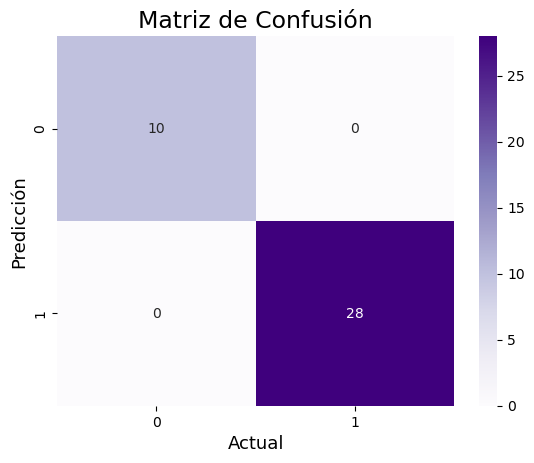

In [49]:
# Visualizo la matriz de confusión de un modelo de clasificación utilizando la biblioteca Seaborn y Matplotlib en Python.
# La matriz de confusión habla de qué tan bien ha evaluado el algoritmo la clasificación, en este caso, de los pokemones legendarios o no legendarios con respecto
# a las propiedades de Total y Resitence.

sns.heatmap(cm,
 annot=True,
 fmt='g',
 cmap='Purples')
plt.ylabel('Predicción',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Matriz de Confusión',fontsize=17)
plt.show()

In [ ]:
# Las predicciones correctas son los valores numericos que se encuentran en el cuadrado superior a la izquierda junto con las que se encuentran en el cuadrado inferior a la derecha.
# Mientras que las predicciones incorrectas son los valores numericos que se encuentran en el cuadrado superior a la derecha junto con las que se encuentran en el cuadrado inferior a la izquierda.

In [ ]:
# OBESERVACIÓN

# El cuadrado superior izquierdo con un valor de 10 representa la cantidad de instancias clasificadas correctamente como clase 0.
# El cuadrado superior derecho con un valor de 0 representa la cantidad de instancias clasificadas incorrectamente como clase 1 cuando en realidad son de clase 0.
# El cuadrado inferior izquierdo con un valor de 0 representa la cantidad de instancias clasificadas incorrectamente como clase 0 cuando en realidad son de clase 1.
# El cuadrado inferior derecho con un valor de 28 representa la cantidad de instancias clasificadas correctamente como clase 1.

# Noto que hay un interesante y muy alto numero de predicciones calificadas como correctas, 38 aplicando la suma de los valores correctos, a diferencia de los nulos casos incorrectos.
# Además en el caso de el cuadrado inferior derecho, clase 1, que son las predicciones correctas, presenta un color purpura intenso a diferencia de los demás. 
# Para el caso del cuadradro superior izquierdo, clase 1, se nota un blanco grisaceo que lo diferencia de los blancos para las instancias clasfiicadas incorrectamente.
# Esto podriamos considerarlo como un excelente primer indicio del modelo.

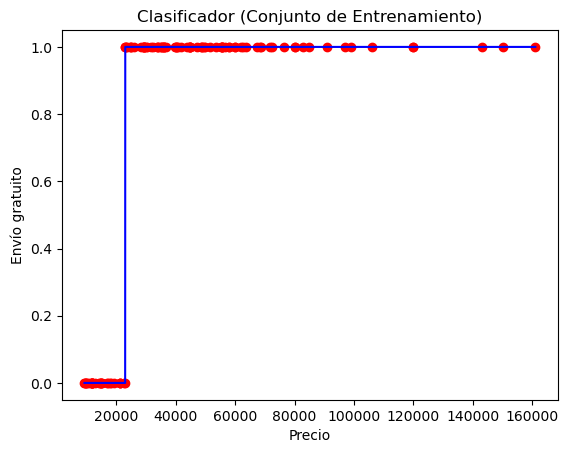

In [51]:
# Visualización del modelo de clasificación en el conjunto de Entrenamiento.

from matplotlib.colors import ListedColormap

# Solo se tiene una variable en X, por lo que no es necesario crear una malla bidimensional
X_set, y_set = X_train, y_train

# Crear un array de valores para la variable única
X_values = np.arange(start = X_set.min() - 1, stop = X_set.max() + 1, step = 0.01)

# Graficar la función de decisión del clasificador
plt.plot(X_values, classifier.predict(X_values.reshape(-1, 1)), color = 'blue')

# Graficar los puntos de datos del conjunto de entrenamiento
plt.scatter(X_set, y_set, color = 'red')

plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Precio')
plt.ylabel('Envío gratuito')
plt.show()

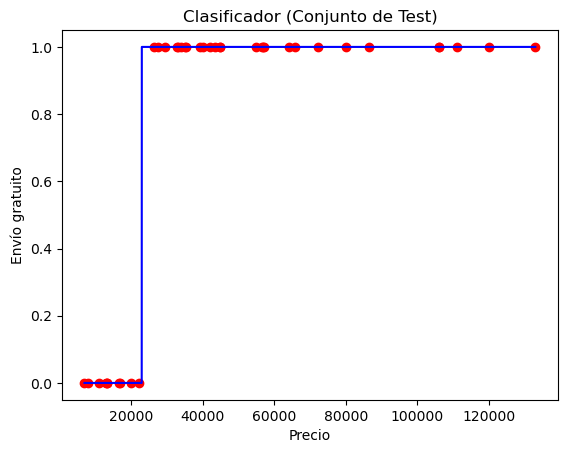

In [52]:
# Visualización del modelo de clasificación en el conjunto de Test.

# Solo se tiene una variable en X, por lo que no es necesario crear una malla bidimensional
X_set, y_set = X_test, y_test

# Crear un array de valores para la variable única
X_values = np.arange(start = X_set.min() - 1, stop = X_set.max() + 1, step = 0.01)

# Graficar la función de decisión del clasificador
plt.plot(X_values, classifier.predict(X_values.reshape(-1, 1)), color = 'blue')

# Graficar los puntos de datos del conjunto de test
plt.scatter(X_set, y_set, color = 'red')

plt.title('Clasificador (Conjunto de Test)')
plt.xlabel('Precio')
plt.ylabel('Envío gratuito')
plt.show()

In [56]:
# Ahora analizaré diferentes métricas de evaluación del rendimiento de un modelo de clasificación.
# Precisión del modelo: La precisión mide la proporción de instancias positivas que fueron correctamente clasificadas como positivas.
# Exactitud del modelo: La exactitud es la proporción total de predicciones correctas realizadas por el modelo. 
# Sensibilidad del modelo: La sensibilidad, también conocida como tasa de verdaderos positivos o recall, mide la proporción de instancias positivas que fueron correctamente identificadas por el modelo.
# Puntaje F1 del modelo: El puntaje F1 es una medida que combina la precisión y la sensibilidad en un solo valor. Es útil cuando se busca un equilibrio entre la precisión y la sensibilidad.
# Curva ROC - AUC del modelo: La curva ROC, y el área bajo la curva (AUC) son métricas utilizadas para evaluar el rendimiento de un modelo de clasificación en problemas de clasificación binaria. La curva ROC representa la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos para diferentes umbrales de clasificación. El AUC mide la capacidad del modelo para distinguir entre las clases. 

In [60]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, classification_report

print(f'Precisión del modelo: {precision_score(y_test, y_pred):.2f}')
print(f'Exactitud del modelo:{accuracy_score(y_test, y_pred):.2f}')
print(f'Sensibilidad del modelo: {recall_score(y_test, y_pred):.2f}')
print(f'Puntaje F1 del modelo:{f1_score(y_test, y_pred):.2f}')
print(f'Curva ROC - AUC del modelo:{roc_auc_score(y_test, y_pred):.2f}')

Precisión del modelo: 1.00
Exactitud del modelo:1.00
Sensibilidad del modelo: 1.00
Puntaje F1 del modelo:1.00
Curva ROC - AUC del modelo:1.00


In [61]:
# Imprimoo las métricas de evaluación del modelo proporcionan información adicional sobre el rendimiento del modelo en términos de precisión, exactitud, sensibilidad, puntaje F1 y el área bajo la curva ROC-AUC.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        28

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [62]:
# Definiciones de otros datos

# Macro avg: Calcula el promedio sin tener en cuenta el desequilibrio en el número de muestras de cada clase. 
# Para cada métrica, se calcula la media de los valores para todas las clases y se informa como el promedio macro avg.
# Se trata de un promedio no ponderado en el que todas las clases tienen el mismo peso. 
# Este enfoque considera que todas las clases son igualmente importantes y le asigna la misma importancia a cada clase al calcular el promedio.

# Weighted avg: Calcula el promedio ponderado teniendo en cuenta el número de muestras en cada clase. 
# Para cada métrica, se calcula la media ponderada de los valores para todas las clases y se informa como el promedio weighted avg. 
# En este enfoque, se asigna un peso proporcional al número de muestras de cada clase. 
# Las clases con más muestras tienen un impacto mayor en el cálculo del promedio. 
# Este enfoque es útil cuando hay un desequilibrio significativo en el número de muestras entre las clases.


# Para la conclución me centraré en los valores específicos obtenidos de cada clase en lugar de los promedios macro avg y weighted avg. 
# Los valores específicos de cada clase proporcionan información más detallada y relevante sobre cómo el modelo está clasificando cada clase individualmente.
# El enfoque en los valores de cada clase es considerablemente más importante cuando hay un desequilibrio significativo en el número de muestras entre las clases. 
# En estos casos, los promedios pueden verse afectados por la clase dominante y no reflejar adecuadamente el rendimiento del modelo en las clases minoritarias.
# Por lo tanto, los valores específicos de cada clase ofrecen una visión más detallada y proporcionan mayor eficiencia en las conclusiones del rendimiento del modelo de clasificación.

In [ ]:
# Conclusión

# Dado los resultados obtenidos con las diferentes metricas e informes puedo sacar las siguientes conclusiones adicionales.
# El modelo tiene una precisión perfecta para la clase 0 con un 100%.
# Con respecto a la clase 1 el porcentaje de presición tambien es perfecto.
# La exactitud o accuracy, es devolvió un porcentaje del 100% lo que significa que todas las instancias se clasificaron correctamente.
# En general, un mayor valor de exactitud o accuracy indica un mejor rendimiento del modelo, pero tambien puede ser engañoso en casos de desequilibrio de clases, donde una clase dominante puede influir en el resultado.
# Por lo tanto es un dato que hay que tomarlo con cierto cuidado.
# Otro aspecto a tener en cuenta es que la sensibilidad con respecto a la clase 0 es del 100%, por lo que el modelo es capaz de identificar de manera confiable a las instancias de esa clase.
# En la clase 1, la sensibilidad es del 100%, tambien perfecto.
# El Puntaje F1, que es una medida que combina precisión y sensibilidad para evaluar el equilibrio entre ambas, arroja un valor del 100%
# Finalmente el porcentaje arrojado por Curva ROC - AUC del modelo es del 100%, por lo que podemos determinar que separa las clases positivas y negativas de manera muy buena y efectiva.

# Mi conclusión final de este modelo de clasificación de Árbol de Decisión, para este caso particular, es que posee un rendimiento perfecto.
# Los valores obtenidos son exatos y eficientes para ambas clases.
# Es uno de los modelo con mayor confiabilidad.

In [ ]:
# Me gustaria hacer un modelo mas para este caso

# Clasificación con Random Forest

# es una extensión del algoritmo de árbol de decisión que utiliza la combinación de múltiples árboles de decisión para mejorar la precisión de la clasificación.
# se selecciona un número aleatorio de puntos que pertenecen al conjunto de entrenamiento, y con esos puntos seleccionados de entre el total, se construye un árbol de decisión de manera que se aplica la técnica Random Forest. 
# La diferencia es que, cada uno de esos árboles, elabora la predicción sobre la categoría a la cual pertenece el punto. 
# Luego se somete a voto, de modo que la categoría que obtiene más votos por parte de los árboles, es la categoría a la cual se clasifica el dato

In [64]:
# Importo las librerias que me brinda Python.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,\
 recall_score, f1_score, roc_auc_score, classification_report
import warnings

In [65]:
# Realizo la importación de los datos.

df = pd.read_csv('termos.csv', encoding='latin1')
df.head()

,ID,Título,Precio,Precio Original,Condición,Cantidad disponible,Marca,Envío gratuito
0,MLA1642499266,Termo De Acero Inoxidable 1 Litro Frio Calor,23099.34,34999.0,new,100,Genérica,True
1,MLA1424303345,Termo Bala Acero Inox Doble Capa Termica 1 Lit...,9400.00,NaN,new,1,Libercam,False
2,MLA1409013755,Termo Thermio 1 L Pico Cebador Uso Extremo De ...,34999.30,49999.0,new,100,Thermio,True
3,MLA1269105647,Termo Media Manija Uruguayo 1 Litro Acero Inox...,11500.00,NaN,new,1,Cosmos,False
4,MLA1489681646,Termo Bala Acero Inoxidable 1 Litro Con Tapón ...,10135.00,NaN,new,1,Termo,False


In [66]:
# Coloco los datos de las columnas Precio en la variable X.
# Coloco los datos de la columna Envío gratuito en la variable y.

X = df.iloc[:, 2].values 
y = df.iloc[:, 7].values
X,y

(array([ 23099.34,   9400.  ,  34999.3 ,  11500.  ,  10135.  ,  40740.  ,
        120000.  , 106000.  ,  26499.  ,  25999.  ,  17100.  , 149999.  ,
         36672.  ,  23399.13,  63543.45,  10999.  , 120000.  ,  44981.5 ,
         42176.  ,  34999.3 ,  29420.32,  15336.  ,  11054.  ,  35991.  ,
         27649.  ,  11881.  ,  43528.06,  34999.3 ,  17900.  ,  55400.  ,
         39999.  ,  22619.42,  14324.1 , 133000.  ,  21283.  ,  15000.  ,
         55600.  ,  35435.4 ,  11959.54,  44981.5 ,  57303.  ,  68700.  ,
         55447.  ,  11959.54,  16799.  , 106000.  ,  11959.54,  29420.32,
         16798.  ,  30499.  ,  35991.  ,  22149.  , 106000.  ,  34169.49,
         64099.  ,  53424.51,  19079.36,  82709.1 ,  57933.  ,  16599.  ,
         39730.  ,  44981.5 ,  33945.  ,  40075.  ,  35435.4 ,  29999.  ,
         65856.  ,  71700.  ,  47249.16,  96900.  ,  44573.  ,  44981.5 ,
         39999.  ,  56713.  ,  28176.  ,  61821.91,   6998.  ,  79999.  ,
         72357.  ,  21274.26,  11959.5

In [67]:
# Utilizo LabelEnconder para convertir a números los datos categóricos de la columna Legendary almacenados en la variable y.

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y = y_encoded 
print(y)

[1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1
 1 0 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1
 1 1]


In [68]:
# Imprimo nuevamente mis variables con sus datos.

X,y

(array([ 23099.34,   9400.  ,  34999.3 ,  11500.  ,  10135.  ,  40740.  ,
        120000.  , 106000.  ,  26499.  ,  25999.  ,  17100.  , 149999.  ,
         36672.  ,  23399.13,  63543.45,  10999.  , 120000.  ,  44981.5 ,
         42176.  ,  34999.3 ,  29420.32,  15336.  ,  11054.  ,  35991.  ,
         27649.  ,  11881.  ,  43528.06,  34999.3 ,  17900.  ,  55400.  ,
         39999.  ,  22619.42,  14324.1 , 133000.  ,  21283.  ,  15000.  ,
         55600.  ,  35435.4 ,  11959.54,  44981.5 ,  57303.  ,  68700.  ,
         55447.  ,  11959.54,  16799.  , 106000.  ,  11959.54,  29420.32,
         16798.  ,  30499.  ,  35991.  ,  22149.  , 106000.  ,  34169.49,
         64099.  ,  53424.51,  19079.36,  82709.1 ,  57933.  ,  16599.  ,
         39730.  ,  44981.5 ,  33945.  ,  40075.  ,  35435.4 ,  29999.  ,
         65856.  ,  71700.  ,  47249.16,  96900.  ,  44573.  ,  44981.5 ,
         39999.  ,  56713.  ,  28176.  ,  61821.91,   6998.  ,  79999.  ,
         72357.  ,  21274.26,  11959.5

In [69]:
# Utilizo train_test_split para dividir un dataset en bloques. 
# Conjunto de testing por un lado y conjunto de entrenamiento por el otro.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [71]:
from sklearn.preprocessing import StandardScaler

# Escalado de los datos
sc_X = StandardScaler()
X_train = X_train.reshape(-1, 1)  # Convertir a formato bidimensional
X_test = X_test.reshape(-1, 1)    # Convertir a formato bidimensional

X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

In [72]:
# Ajusto el modelo de regresión logística con el conjunto de entrenamiento.
# Esto se hace para hacer predicciones en los datos de prueba y mostrar una tabla que compara las etiquetas reales con las etiquetas predichas para una muestra de prueba limitada.

classifier = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicción': y_pred}).head(100)

,Actual,Predicción
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,1,1
8,0,0
9,1,1


In [73]:
# Construyo la matriz de confusión, la cual es una técnica muy potente. 
# Se calcula sobre el conjunto de testing y se puede observar si las predicciones que ha realizado el algoritmo son potentes

cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0],
       [ 0, 28]], dtype=int64)

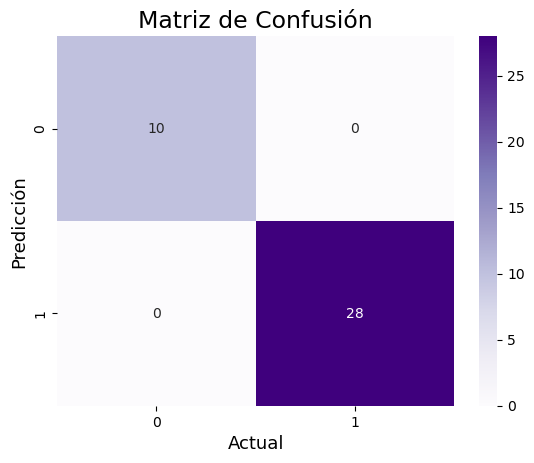

In [74]:
# Visualizo la matriz de confusión de un modelo de clasificación utilizando la biblioteca Seaborn y Matplotlib en Python.
# La matriz de confusión habla de qué tan bien ha evaluado el algoritmo la clasificación, en este caso, de los pokemones legendarios o no legendarios con respecto
# a las propiedades de Total y Resitence.

sns.heatmap(cm,
 annot=True,
 fmt='g',
 cmap='Purples')
plt.ylabel('Predicción',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Matriz de Confusión',fontsize=17)
plt.show()

In [ ]:
# OBESERVACIÓN

# El cuadrado superior izquierdo con un valor de 10 representa la cantidad de instancias clasificadas correctamente como clase 0.
# El cuadrado superior derecho con un valor de 0 representa la cantidad de instancias clasificadas incorrectamente como clase 1 cuando en realidad son de clase 0.
# El cuadrado inferior izquierdo con un valor de 0 representa la cantidad de instancias clasificadas incorrectamente como clase 0 cuando en realidad son de clase 1.
# El cuadrado inferior derecho con un valor de 28 representa la cantidad de instancias clasificadas correctamente como clase 1.

# Noto que hay un interesante y muy alto numero de predicciones calificadas como correctas, 38 aplicando la suma de los valores correctos, a diferencia de los nulos casos incorrectos.
# Además en el caso de el cuadrado inferior derecho, clase 1, que son las predicciones correctas, presenta un color purpura intenso a diferencia de los demás. 
# Para el caso del cuadradro superior izquierdo, clase 1, se nota un blanco grisaceo que lo diferencia de los blancos para las instancias clasfiicadas incorrectamente.
# Esto podriamos considerarlo como un excelente primer indicio del modelo.

# Los datos parecen ser exactamente los mismos que en el modelo de Arboles de desición, esto es un gran indicativo.

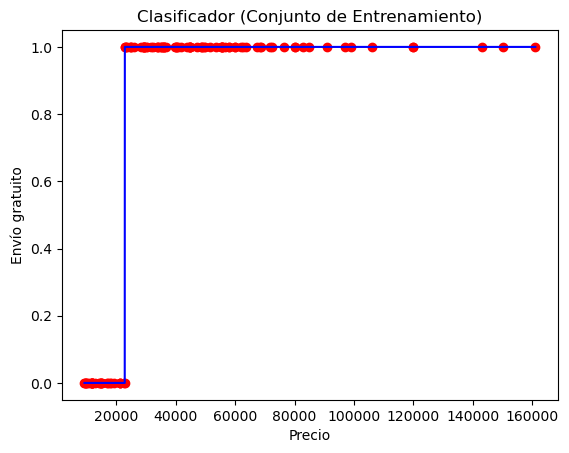

In [75]:
# Visualización del modelo de clasificación en el conjunto de Entrenamiento.

from matplotlib.colors import ListedColormap

# Solo se tiene una variable en X, por lo que no es necesario crear una malla bidimensional
X_set, y_set = X_train, y_train

# Crear un array de valores para la variable única
X_values = np.arange(start = X_set.min() - 1, stop = X_set.max() + 1, step = 0.01)

# Graficar la función de decisión del clasificador
plt.plot(X_values, classifier.predict(X_values.reshape(-1, 1)), color = 'blue')

# Graficar los puntos de datos del conjunto de entrenamiento
plt.scatter(X_set, y_set, color = 'red')

plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Precio')
plt.ylabel('Envío gratuito')
plt.show()

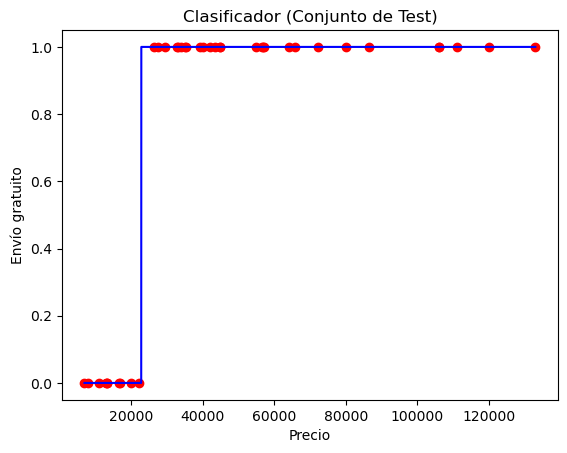

In [76]:
# Visualización del modelo de clasificación en el conjunto de Test.

# Solo se tiene una variable en X, por lo que no es necesario crear una malla bidimensional
X_set, y_set = X_test, y_test

# Crear un array de valores para la variable única
X_values = np.arange(start = X_set.min() - 1, stop = X_set.max() + 1, step = 0.01)

# Graficar la función de decisión del clasificador
plt.plot(X_values, classifier.predict(X_values.reshape(-1, 1)), color = 'blue')

# Graficar los puntos de datos del conjunto de test
plt.scatter(X_set, y_set, color = 'red')

plt.title('Clasificador (Conjunto de Test)')
plt.xlabel('Precio')
plt.ylabel('Envío gratuito')
plt.show()

In [77]:
# Ahora analizaré diferentes métricas de evaluación del rendimiento de un modelo de clasificación.
# Precisión del modelo: La precisión mide la proporción de instancias positivas que fueron correctamente clasificadas como positivas.
# Exactitud del modelo: La exactitud es la proporción total de predicciones correctas realizadas por el modelo. 
# Sensibilidad del modelo: La sensibilidad, también conocida como tasa de verdaderos positivos o recall, mide la proporción de instancias positivas que fueron correctamente identificadas por el modelo.
# Puntaje F1 del modelo: El puntaje F1 es una medida que combina la precisión y la sensibilidad en un solo valor. Es útil cuando se busca un equilibrio entre la precisión y la sensibilidad.
# Curva ROC - AUC del modelo: La curva ROC, y el área bajo la curva (AUC) son métricas utilizadas para evaluar el rendimiento de un modelo de clasificación en problemas de clasificación binaria. La curva ROC representa la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos para diferentes umbrales de clasificación. El AUC mide la capacidad del modelo para distinguir entre las clases. 

In [78]:
print(f'Precisión del modelo: {precision_score(y_test, y_pred):.2f}')
print(f'Exactitud del modelo:{accuracy_score(y_test, y_pred):.2f}')
print(f'Sensibilidad del modelo: {recall_score(y_test, y_pred):.2f}')
print(f'Puntaje F1 del modelo:{f1_score(y_test, y_pred):.2f}')
print(f'Curva ROC - AUC del modelo:{roc_auc_score(y_test, y_pred):.2f}')

Precisión del modelo: 1.00
Exactitud del modelo:1.00
Sensibilidad del modelo: 1.00
Puntaje F1 del modelo:1.00
Curva ROC - AUC del modelo:1.00


In [79]:
# Imprimoo las métricas de evaluación del modelo proporcionan información adicional sobre el rendimiento del modelo en términos de precisión, exactitud, sensibilidad, puntaje F1 y el área bajo la curva ROC-AUC.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        28

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [ ]:
# Conclusión

# Dado los resultados obtenidos con las diferentes metricas e informes puedo sacar las siguientes conclusiones adicionales.
# El modelo tiene una precisión perfecta para la clase 0 con un 100%.
# Con respecto a la clase 1 el porcentaje de presición tambien es perfecto.
# La exactitud o accuracy, es devolvió un porcentaje del 100% lo que significa que todas las instancias se clasificaron correctamente.
# En general, un mayor valor de exactitud o accuracy indica un mejor rendimiento del modelo, pero tambien puede ser engañoso en casos de desequilibrio de clases, donde una clase dominante puede influir en el resultado.
# Por lo tanto es un dato que hay que tomarlo con cierto cuidado.
# Otro aspecto a tener en cuenta es que la sensibilidad con respecto a la clase 0 es del 100%, por lo que el modelo es capaz de identificar de manera confiable a las instancias de esa clase.
# En la clase 1, la sensibilidad es del 100%, tambien perfecto.
# El Puntaje F1, que es una medida que combina precisión y sensibilidad para evaluar el equilibrio entre ambas, arroja un valor del 100%
# Finalmente el porcentaje arrojado por Curva ROC - AUC del modelo es del 100%, por lo que podemos determinar que separa las clases positivas y negativas de manera muy buena y efectiva.

# Mi conclusión final de este modelo de clasificación de Árbol de Decisión, para este caso particular, es que posee un rendimiento perfecto.
# Los valores obtenidos son exatos y eficientes para ambas clases.
# Es uno de los modelo con mayor confiabilidad.

# Conclusión adicional, los valores obtenidos fueron igual de exactos que con el modelo de arbol de desición, tanto el Random Forest como el modelo anterior fueron modelos eficientes y confiables para este caso.